In [13]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os


import cv2

In [14]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [15]:
FOLDER_PATH = r"Downloads/mask/dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [16]:
data = []
labels = []

In [17]:
for category in CATEGORIES:
    path = os.path.join(FOLDER_PATH, category)
    img_names = os.listdir(path)
    for img in img_names:
        img_path = os.path.join(path, img)
        image = load_img(img_path,target_size = (224,224,3))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category)
        
        
        
        

In [18]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
test_size=0.20, stratify=labels, random_state=42)


In [19]:
aug = ImageDataGenerator(
rotation_range=20,
zoom_range=0.15,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.15,
horizontal_flip=True,
fill_mode="nearest")

In [20]:
inputmodel = MobileNetV2(weights="imagenet", include_top=False,
input_shape=(224, 224, 3))

In [21]:
outputmodel = inputmodel.output
outputmodel = AveragePooling2D(pool_size=(7, 7))(outputmodel)
outputmodel = Flatten(name="flatten")(outputmodel)
outputmodel = Dense(128, activation="relu")(outputmodel)
outputmodel = Dropout(0.5)(outputmodel)
outputmodel = Dense(2, activation="softmax")(outputmodel)

In [22]:
model = Model(inputs=inputmodel.input, outputs=outputmodel)

In [24]:
for layer in inputmodel.layers:
    layer.trainable = False

In [25]:

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
metrics=["accuracy"])

In [26]:
H = model.fit(
aug.flow(trainX, trainY, batch_size=BS),
steps_per_epoch=len(trainX) // BS,
validation_data=(testX, testY),
validation_steps=len(testX) // BS,
epochs=10)

Epoch 1/10
95/95 [==============================] - 62s 626ms/step - loss: 0.5951 - accuracy: 0.7366 - val_loss: 0.1588 - val_accuracy: 0.9883
Epoch 2/10
95/95 [==============================] - 57s 603ms/step - loss: 0.1748 - accuracy: 0.9617 - val_loss: 0.0776 - val_accuracy: 0.9922
Epoch 3/10
95/95 [==============================] - 57s 599ms/step - loss: 0.0970 - accuracy: 0.9766 - val_loss: 0.0528 - val_accuracy: 0.9935
Epoch 4/10
95/95 [==============================] - 60s 633ms/step - loss: 0.0814 - accuracy: 0.9798 - val_loss: 0.0434 - val_accuracy: 0.9935
Epoch 5/10
95/95 [==============================] - 59s 619ms/step - loss: 0.0712 - accuracy: 0.9733 - val_loss: 0.0395 - val_accuracy: 0.9935
Epoch 6/10
95/95 [==============================] - 58s 610ms/step - loss: 0.0573 - accuracy: 0.9839 - val_loss: 0.0367 - val_accuracy: 0.9935
Epoch 7/10
95/95 [==============================] - 58s 605ms/step - loss: 0.0523 - accuracy: 0.9865 - val_loss: 0.0365 - val_accuracy: 0.9935

In [27]:

predIdxs = model.predict(testX, batch_size=BS)

In [28]:
predIdxs = np.argmax(predIdxs, axis=1)

In [29]:
print(classification_report(testY.argmax(axis=1), predIdxs,
target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



In [30]:

model.save("mask_detector.model", save_format="h5")

In [31]:
import numpy as np
from keras_preprocessing import image

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
img = image.load_img('Downloads/mask/dataset/single_prediction/facemask_4.jpg')

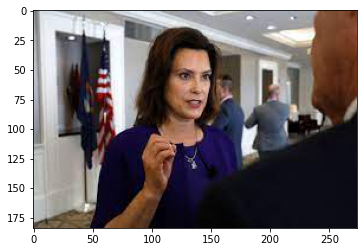

In [34]:
plt.imshow(img)